*Mount the Google drive (to have permanent changes)*

In [ ]:

from google.colab import drive
drive.mount('/content/drive')     

Mounted at /content/drive


*Put the* *path* 

In [ ]:
cd /content/drive/MyDrive/Tf2-Object-Detection-Folder/object_detection 

/content/drive/MyDrive/Tf2-Object-Detection-Folder/object_detection


*Import Libraries*

In [ ]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
from object_detection.builders import model_builder
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
from IPython.display import display
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

*Compulsory Installation*

In [ ]:
#not permanent always need to be done when opening colab
!pip install tf-models-official
!pip install tf_slim          

     |████████████████████████████████| 1.6 MB 16.5 MB/s 
     |████████████████████████████████| 90 kB 9.6 MB/s 
     |████████████████████████████████| 43 kB 2.0 MB/s 
     |████████████████████████████████| 679 kB 52.6 MB/s 
     |████████████████████████████████| 37.1 MB 46 kB/s 
     |████████████████████████████████| 211 kB 75.8 MB/s 
     |████████████████████████████████| 99 kB 10.0 MB/s 
     |████████████████████████████████| 636 kB 73.7 MB/s 
     |████████████████████████████████| 352 kB 60.2 MB/s 
     |████████████████████████████████| 1.2 MB 48.6 MB/s 
  Created wheel for py-cpuinfo: filename=py_cpuinfo-8.0.0-py3-none-any.whl size=22257 sha256=af82ed1b4f3186a58b4d9c494754292b9270b7aafacb15288627b920d64398c1
  Stored in directory: /root/.cache/pip/wheels/d2/f1/1f/041add21dc9c4220157f1bd2bd6afe1f1a49524c3396b94401
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16181 sha256=34b66217d8efcf107bb2fe58751f8550023ca091f705459c90c74ff64cfc7c69
  Stored 

In [ ]:
#Directory to training_folder
%cd /content/drive/MyDrive/Tf2-Object-Detection-Folder/object_detection

/content/drive/MyDrive/Tf2-Object-Detection-Folder/object_detection


*Compulsory Installation*

In [ ]:
#compulsory installation for training portion 
!pip install lvis 

Training Model

Compulsory Training Step 

In [ ]:
!python model_main_tf2.py --pipeline_config_path=training/ssd_mobilenet_v2_320x320_coco17_tpu-8.config --model_dir=SSDnew --alsologtostderr --sample_1_of_n_eval_examples=1 --eval_timeout=300   

2021-08-03 05:53:59.114380: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-08-03 05:54:54.303863: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-08-03 05:54:54.374060: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-03 05:54:54.374655: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-08-03 05:54:54.374716: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-08-03 05:54:54.486003: I tensorflow/stream_executor/platform/default

*Exporting model's checkpoints*

In [ ]:
#exporting model info from training checkpoint and adding it to SSDmobileoutput model
!python exporter_main_v2.py --trained_checkpoint_dir=SSDnew --pipeline_config_path=training/ssd_mobilenet_v2_320x320_coco17_tpu-8.config --output_directory SSDmobileoutput 

2021-08-03 06:46:12.996078: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-08-03 06:46:15.407922: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-08-03 06:46:15.438455: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-03 06:46:15.439072: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-08-03 06:46:15.439115: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-08-03 06:46:15.443397: I tensorflow/stream_executor/platform/default

In [ ]:
cd /content/drive/MyDrive/Tf2-Object-Detection-Folder/object_detection/SSDmobileoutput/saved_model

/content/drive/MyDrive/Tf2-Object-Detection-Folder/object_detection/SSDmobileoutput/saved_model


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [ ]:
cd /content/drive/MyDrive/Tf2-Object-Detection-Folder/object_detection

/content/drive/MyDrive/Tf2-Object-Detection-Folder/object_detection


*converting model to quantized graph*

In [ ]:
%%bash
#converting saved model to quantized graph
python export_tflite_graph_tf2.py \
  --pipeline_config_path /content/drive/MyDrive/Tf2-Object-Detection-Folder/object_detection/training/ssd_mobilenet_v2_320x320_coco17_tpu-8.config \
  --trained_checkpoint_dir /content/drive/MyDrive/Tf2-Object-Detection-Folder/object_detection/SSDnew \
  --output_directory tflite1 \  
  --max_detections=10

2021-08-03 06:47:22.070927: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-08-03 06:47:24.594344: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-08-03 06:47:24.626754: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-03 06:47:24.627346: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-08-03 06:47:24.627385: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-08-03 06:47:24.629957: I tensorflow/stream_executor/platform/default

*Converting model to tflite format*

In [ ]:
#Converting to tflite format
converter = tf.lite.TFLiteConverter.from_saved_model('tflite1/saved_model')
tflite_model = converter.convert()

In [ ]:
with open('EM_accurate_modified.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
cd /content/drive/MyDrive/Tf2-Object-Detection-Folder/object_detection

/content/drive/MyDrive/Tf2-Object-Detection-Folder/object_detection


***Testing*** 

In [ ]:
# patch tf1 into `utils.ops`
utils_ops.tf = tf.compat.v1

# Patch the location of gfile
tf.gfile = tf.io.gfile

In [ ]:
def load_model(model_name):
  base_url = 'http://download.tensorflow.org/models/object_detection/'
  model_file = model_name + '.tar.gz'
  model_dir = tf.keras.utils.get_file(
    fname=model_name, 
    origin=base_url + model_file,
    untar=True)

  model_dir = pathlib.Path(model_dir)/"saved_model"

  model = tf.saved_model.load(str(model_dir))

In [ ]:
# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = '/content/drive/MyDrive/Tf2-Object-Detection-Folder/object_detection/images/labelmap.pbtxt'
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

*Importing images (through path)*

In [ ]:
# If you want to test the code with your images, just add path to the images to the TEST_IMAGE_PATHS.
import pathlib
PATH_TO_TEST_IMAGES_DIR = pathlib.Path('/content/drive/MyDrive/TESTING FOLDER/8')
TEST_IMAGE_PATHS = sorted(list(PATH_TO_TEST_IMAGES_DIR.glob("*.jpg")))
TEST_IMAGE_PATHS 
#PATH_TO_TEST_IMAGES_DIR       

[PosixPath('/content/drive/MyDrive/TESTING FOLDER/8/1623808893_0.jpg'),
 PosixPath('/content/drive/MyDrive/TESTING FOLDER/8/1623809002_0.jpg'),
 PosixPath('/content/drive/MyDrive/TESTING FOLDER/8/1623809016_0.jpg'),
 PosixPath('/content/drive/MyDrive/TESTING FOLDER/8/1623809028_0.jpg'),
 PosixPath('/content/drive/MyDrive/TESTING FOLDER/8/1623809108_0.jpg'),
 PosixPath('/content/drive/MyDrive/TESTING FOLDER/8/1623809146_0.jpg'),
 PosixPath('/content/drive/MyDrive/TESTING FOLDER/8/1623809150_0.jpg'),
 PosixPath('/content/drive/MyDrive/TESTING FOLDER/8/1623809192_0.jpg'),
 PosixPath('/content/drive/MyDrive/TESTING FOLDER/8/1623809209_0.jpg'),
 PosixPath('/content/drive/MyDrive/TESTING FOLDER/8/1623809239_0.jpg'),
 PosixPath('/content/drive/MyDrive/TESTING FOLDER/8/1623809281_0.jpg'),
 PosixPath('/content/drive/MyDrive/TESTING FOLDER/8/1623809379_0.jpg'),
 PosixPath('/content/drive/MyDrive/TESTING FOLDER/8/1623809408_0.jpg'),
 PosixPath('/content/drive/MyDrive/TESTING FOLDER/8/1623809420_0

In [ ]:
len(TEST_IMAGE_PATHS)

51

*Load the saved_model*

In [ ]:
detection_model=tf.saved_model.load('SSDmobileoutput/saved_model')
print(detection_model.signatures['serving_default'].inputs)

[<tf.Tensor 'input_tensor:0' shape=(1, None, None, 3) dtype=uint8>, <tf.Tensor 'unknown:0' shape=() dtype=resource>, <tf.Tensor 'unknown_0:0' shape=() dtype=resource>, <tf.Tensor 'unknown_1:0' shape=() dtype=resource>, <tf.Tensor 'unknown_2:0' shape=() dtype=resource>, <tf.Tensor 'unknown_3:0' shape=() dtype=resource>, <tf.Tensor 'unknown_4:0' shape=() dtype=resource>, <tf.Tensor 'unknown_5:0' shape=() dtype=resource>, <tf.Tensor 'unknown_6:0' shape=() dtype=resource>, <tf.Tensor 'unknown_7:0' shape=() dtype=resource>, <tf.Tensor 'unknown_8:0' shape=() dtype=resource>, <tf.Tensor 'unknown_9:0' shape=() dtype=resource>, <tf.Tensor 'unknown_10:0' shape=() dtype=resource>, <tf.Tensor 'unknown_11:0' shape=() dtype=resource>, <tf.Tensor 'unknown_12:0' shape=() dtype=resource>, <tf.Tensor 'unknown_13:0' shape=() dtype=resource>, <tf.Tensor 'unknown_14:0' shape=() dtype=resource>, <tf.Tensor 'unknown_15:0' shape=() dtype=resource>, <tf.Tensor 'unknown_16:0' shape=() dtype=resource>, <tf.Tenso

**RESULTS**

In [ ]:
def run_inference_for_single_image(model, image):
  image = np.asarray(image)
  # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
  input_tensor = tf.convert_to_tensor(image)
  # The model expects a batch of images, so add an axis with `tf.newaxis`.
  input_tensor = input_tensor[tf.newaxis,...]

  # Run inference
  model_fn = model.signatures['serving_default']
  output_dict = model_fn(input_tensor)

  # All outputs are batches tensors.
  # Convert to numpy arrays, and take index [0] to remove the batch dimension.
  # We're only interested in the first num_detections.
  num_detections = int(output_dict.pop('num_detections'))
  output_dict = {key:value[0, :num_detections].numpy() 
                 for key,value in output_dict.items()}
  output_dict['num_detections'] = num_detections

  # detection_classes should be ints.
  output_dict['detection_classes'] = output_dict['detection_classes'].astype(np.int64)
   
  # Handle models with masks:
  if 'detection_masks' in output_dict:
    # Reframe the the bbox mask to the image size.
    detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
              output_dict['detection_masks'], output_dict['detection_boxes'],
               image.shape[0], image.shape[1])      
    detection_masks_reframed = tf.cast(detection_masks_reframed > 0.5,
                                       tf.uint8)
    output_dict['detection_masks_reframed'] = detection_masks_reframed.numpy()
    
  return output_dict

In [ ]:
def show_inference(model, image_path):
  # the array based representation of the image will be used later in order to prepare the
  # result image with boxes and labels on it.
  image_np = np.array(Image.open(image_path))
  # Actual detection.
  output_dict = run_inference_for_single_image(model, image_np)
  # Visualization of the results of a detection.
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks_reframed', None),
      use_normalized_coordinates=True,
      line_thickness=8)

  display(Image.fromarray(image_np))

In [ ]:
import time as time

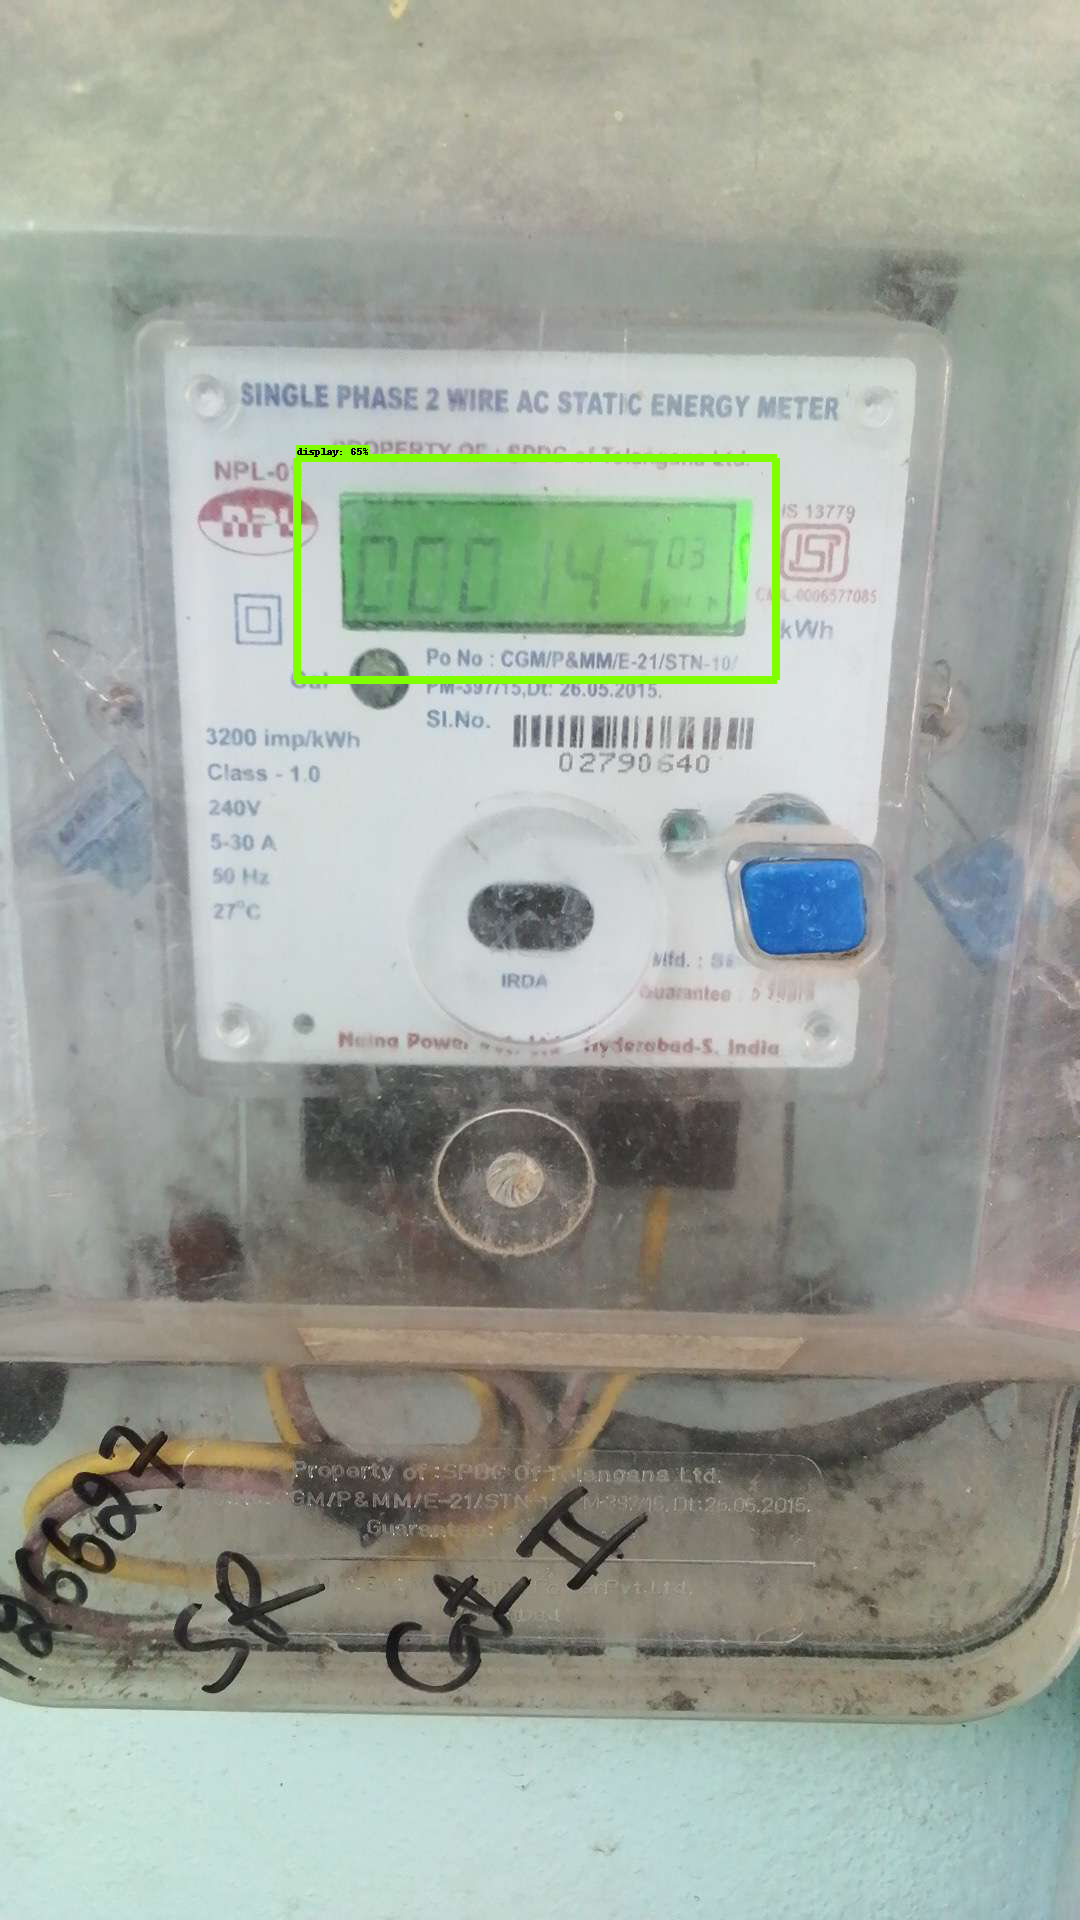

In [ ]:
from IPython.display import clear_output
for image_path in TEST_IMAGE_PATHS:
  clear_output(wait=True)
  show_inference(detection_model, image_path)
  time.sleep(10)

**Testing using Tflite model**

*Getting interpreter results from tflite model*

In [ ]:
#Run this to get tflite model details
import tensorflow as tf
import numpy as np
import cv2
import pathlib
from google.colab.patches import cv2_imshow
#use tflite model in model_path
interpreter = tf.lite.Interpreter(model_path="EM_accurate_modified.tflite")

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print(input_details)
print(output_details)

#interpreter.allocate_tensors()

[{'name': 'serving_default_input:0', 'index': 0, 'shape': array([  1, 300, 300,   3], dtype=int32), 'shape_signature': array([  1, 300, 300,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
[{'name': 'StatefulPartitionedCall:3', 'index': 247, 'shape': array([], dtype=int32), 'shape_signature': array([], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}, {'name': 'StatefulPartitionedCall:2', 'index': 248, 'shape': array([], dtype=int32), 'shape_signature': array([], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([

In [ ]:
cd /content/drive/MyDrive/Tf2-Object-Detection-Folder/object_detection

/content/drive/MyDrive/Tf2-Object-Detection-Folder/object_detection


*Test images using tflite model*

[{'name': 'serving_default_input:0', 'index': 0, 'shape': array([  1, 300, 300,   3], dtype=int32), 'shape_signature': array([  1, 300, 300,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
[{'name': 'StatefulPartitionedCall:3', 'index': 247, 'shape': array([], dtype=int32), 'shape_signature': array([], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}, {'name': 'StatefulPartitionedCall:2', 'index': 248, 'shape': array([], dtype=int32), 'shape_signature': array([], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([

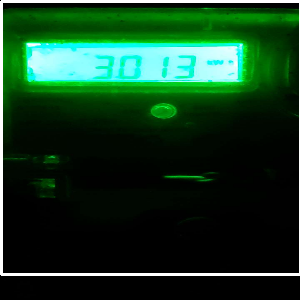

[[[ 4.3482229e-02  9.1906786e-03  4.2354637e-01  1.0079641e+00]
  [ 1.4113961e-01  3.9601386e-02  3.6726153e-01  1.0089200e+00]
  [ 1.3393080e-01 -1.8574804e-02  6.3107580e-01  1.0029306e+00]
  [ 1.3532881e-02  6.8789124e-03  1.0503687e-01  1.0295618e+00]
  [ 5.0611591e-01  6.2321246e-02  9.9387574e-01  1.0747685e+00]
  [ 5.6880154e-04  2.2217095e-02  4.2263903e-02  6.8966311e-01]
  [ 9.9134799e-03 -5.0697774e-02  5.2246884e-02  5.9546888e-01]
  [ 3.7386771e-03  1.6567835e-01  3.9861441e-02  9.1168010e-01]
  [ 2.6818290e-03  3.8302943e-01  4.0967628e-02  1.0981668e+00]
  [ 4.3048173e-01  1.0318181e-01  6.3420159e-01  9.2416525e-01]]]
[[0.96886647 0.05566433 0.02960363 0.02854514 0.01490399 0.01470008
  0.01258555 0.01153666 0.01153052 0.00925243]]
[0.04348223 0.00919068 0.42354637 1.0079641 ]
0.96886647


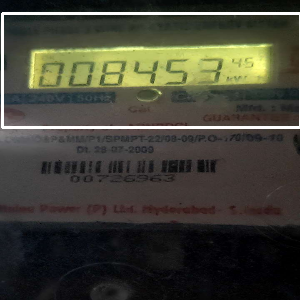

[[[ 2.5696251e-01  2.8961778e-01  3.6303005e-01  6.4787459e-01]
  [ 9.0574846e-04  1.3931572e-02  8.2097322e-02  9.8217165e-01]
  [ 2.3716262e-01 -4.5022368e-03  7.6410794e-01  9.7159123e-01]
  [ 6.9398955e-03  4.2963654e-02  1.9869772e-01  1.0190632e+00]
  [ 2.4878117e-01  2.6723808e-01  4.2711434e-01  8.6360425e-01]
  [ 4.9059969e-01  3.8297594e-02  9.8702115e-01  1.0901246e+00]
  [ 3.5603061e-02  4.3517530e-02  3.1426525e-01  9.9222928e-01]
  [ 4.5124111e-01  2.5171161e-01  5.6695747e-01  7.4153662e-01]
  [ 1.5960822e-01  2.5707301e-01  3.4670678e-01  8.7345684e-01]
  [ 7.4862093e-01  8.9661270e-02  9.9446827e-01  1.0127354e+00]]]
[[0.24123117 0.12268132 0.03026941 0.02908164 0.02292782 0.02266082
  0.02202955 0.0148842  0.01458919 0.0131546 ]]


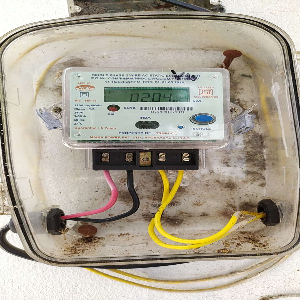

[[[ 0.03347504  0.1662103   0.54937124  0.9733112 ]
  [ 0.07903457  0.04708171  0.7842379   1.0167673 ]
  [ 0.04108757  0.28288803  0.2534261   0.9003136 ]
  [ 0.0030705   0.48265702  0.06137097  1.0358479 ]
  [ 0.22969687  0.21010402  0.4580468   0.8911325 ]
  [ 0.02547448  0.57981384  0.13093118  0.9874619 ]
  [ 0.00446213  0.15582588  0.05177925  0.7126236 ]
  [ 0.00922022  0.23647824  0.11161135  0.9593817 ]
  [ 0.02870938  0.2147033   0.12959714  0.6068802 ]
  [-0.08063582  0.41472718  0.7001462   1.0542068 ]]]
[[0.5860091  0.14735061 0.06015486 0.04673481 0.03912547 0.03756499
  0.03742746 0.03320315 0.02996999 0.02827528]]
[0.03347504 0.1662103  0.54937124 0.9733112 ]
0.5860091


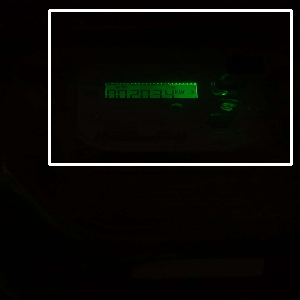

[[[ 0.01806974  0.00469565  0.8739128   1.0253646 ]
  [ 0.01044855  0.04035872  0.08403111  0.95396173]
  [ 0.04491723 -0.04265094  0.5631937   0.95047426]
  [ 0.4317225   0.0815137   0.98636115  1.027492  ]
  [ 0.4205159   0.7553931   0.950668    0.94996244]
  [ 0.56288964  0.34680027  1.0013738   0.9808447 ]
  [ 0.63316107  0.6889247   0.7985008   1.0146521 ]
  [-0.06717604  0.2024737   0.71372175  1.0607111 ]
  [ 0.00557304  0.19613746  0.11936652  1.0581107 ]
  [ 0.00254376 -0.00857064  0.0516893   0.63996863]]]
[[0.71788234 0.05592734 0.03629786 0.0341962  0.01158139 0.01108494
  0.01101306 0.01007551 0.00995278 0.0099422 ]]
[0.01806974 0.00469565 0.8739128  1.0253646 ]
0.71788234


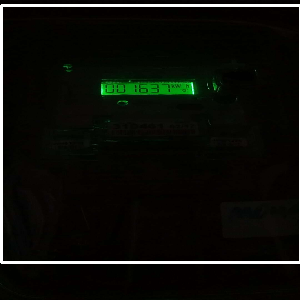

[[[ 0.09597763  0.03549948  0.42965963  0.9828414 ]
  [ 0.01196425  0.03454536  0.3038115   0.9747142 ]
  [ 0.14430745 -0.00665066  0.61405545  1.0002121 ]
  [ 0.50793195  0.06283498  0.9896054   1.08134   ]
  [ 0.7432376   0.01071     0.9978626   0.9765693 ]
  [ 0.00854824  0.06910476  0.15629074  1.0421035 ]
  [ 0.00823621 -0.04929328  0.0545647   0.56685513]
  [ 0.00165103  0.46806848  0.04412577  1.1338313 ]
  [ 0.34245858  0.03599328  0.55025804  0.9537109 ]
  [ 0.09651382  0.793083    0.3786363   0.9383643 ]]]
[[0.9790642  0.04328826 0.03105596 0.01789579 0.01329768 0.01307636
  0.01209888 0.01101193 0.01002192 0.00876877]]
[0.09597763 0.03549948 0.42965963 0.9828414 ]
0.9790642


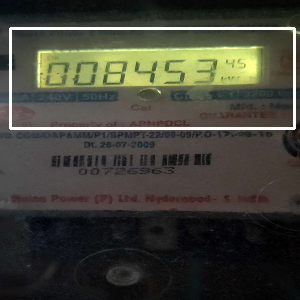

[[[ 0.00974408 -0.01274604  0.6613772   1.0218594 ]
  [ 0.62965393  0.01669934  0.97753334  1.0008523 ]
  [ 0.7545031  -0.01094055  0.99482876  0.9909073 ]
  [ 0.00587636 -0.00757867  0.08023091  1.0253329 ]
  [ 0.8749903   0.02497697  0.97588605  0.8652216 ]
  [ 0.53462505 -0.01123801  0.85459256  1.0010456 ]
  [ 0.4374022   0.06919438  0.94851524  1.0308228 ]
  [ 0.2754931  -0.02924186  0.6463556   1.0370877 ]
  [ 0.01896355  0.01308563  0.30471826  1.002418  ]
  [ 0.6520047   0.01898363  0.8515705   0.88618886]]]
[[0.9632523  0.04948145 0.02810743 0.01791066 0.01788288 0.01329857
  0.01053894 0.01053005 0.00820053 0.00789705]]
[ 0.00974408 -0.01274604  0.6613772   1.0218594 ]
0.9632523


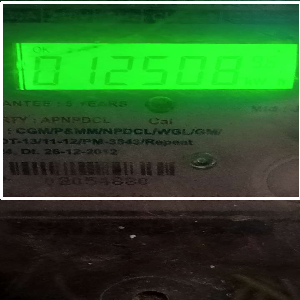

[[[-0.02835065 -0.02921683  0.9310182   1.0516443 ]
  [ 0.02822328 -0.03018463  0.5073246   0.9584126 ]
  [ 0.00539403  0.0064756   0.07710762  0.98631537]
  [-0.06672269  0.24102294  0.7161815   1.0672295 ]
  [ 0.01865076 -0.02738696  0.25553048  0.8883333 ]
  [ 0.45700908  0.01048702  0.9698818   1.039104  ]
  [ 0.19857615  0.03238195  0.7801507   1.0345681 ]
  [ 0.00238656  0.01130638  0.05024481  0.6999836 ]
  [ 0.06507963 -0.08853637  0.82173246  0.56234217]
  [ 0.01401448  0.08889855  0.62657064  0.5243838 ]]]
[[0.37527317 0.04465356 0.03262374 0.01204556 0.01104593 0.00983575
  0.00970346 0.00938338 0.00930145 0.0090887 ]]


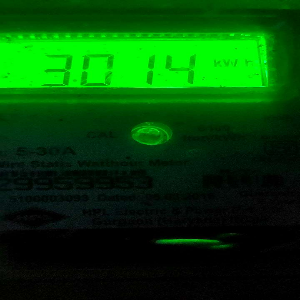

[[[ 0.01751649  0.07732159  1.0490134   0.91764605]
  [ 0.00253328 -0.04500607  0.09080224  0.8552418 ]
  [-0.00289519  0.00984961  0.42665613  0.2737791 ]
  [ 0.5452638   0.02289104  1.0006684   0.9687971 ]
  [ 0.02708238 -0.03898364  0.57390463  0.67564464]
  [ 0.74841416 -0.05976346  0.99426293  0.8081641 ]
  [-0.20778024 -0.03954741  0.71065354  0.5349494 ]
  [ 0.10918163  0.01958425  0.5450433   0.25084293]
  [ 0.14548013 -0.08606215  0.7976805   0.5256773 ]
  [ 0.1649749   0.05265206  0.82766664  0.8681816 ]]]
[[0.04875264 0.04039365 0.0389702  0.03890541 0.03056157 0.0196906
  0.01821056 0.01797894 0.01760671 0.01578575]]


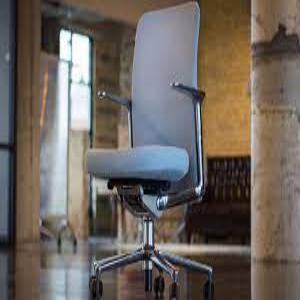

[[[ 0.02263844  0.25898874  0.6150564   1.0073286 ]
  [ 0.03281331 -0.02310303  0.5547027   0.6207937 ]
  [ 0.02806419  0.03910735  0.8594711   0.99403226]
  [-0.11406755  0.42729917  0.68693125  1.0399175 ]
  [ 0.01114854 -0.1351424   0.5732719   0.42657143]
  [ 0.0658277   0.47592336  0.8736954   1.093674  ]
  [ 0.09710109  0.20223194  0.88729566  0.82614034]
  [ 0.00270575  0.07708624  0.4456038   0.9354496 ]
  [ 0.1307989  -0.08065788  0.82516503  0.50485057]
  [ 0.20173936  0.00821656  0.49415523  0.53918374]]]
[[0.18067622 0.16864634 0.15821621 0.06636688 0.04523629 0.04520518
  0.04055396 0.0341666  0.03388453 0.03000748]]


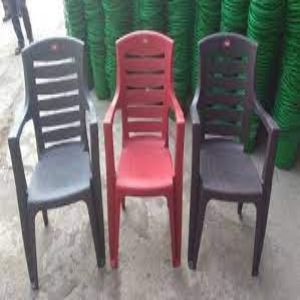

[[[ 0.02078664  0.05461904  0.99965024  0.9644563 ]
  [ 0.00620559  0.23579317  0.5878732   1.0223184 ]
  [ 0.00749993  0.00949237  0.09269191  0.8742938 ]
  [-0.16840738  0.45005158  0.6975626   1.0186188 ]
  [-0.00277375  0.04542589  0.3879813   0.96755147]
  [ 0.00714046  0.3659663   0.04695874  1.0160447 ]
  [ 0.00485142  0.05720341  0.05237373  0.6535062 ]
  [ 0.01623627 -0.03558862  0.24078622  0.83026516]
  [ 0.06013301  0.41485742  0.94371474  1.1537185 ]
  [ 0.42463273  0.05828443  0.9956241   1.0256108 ]]]
[[0.07742167 0.05121812 0.03665003 0.02688554 0.0234808  0.01974103
  0.01787668 0.01694626 0.01670551 0.01581314]]


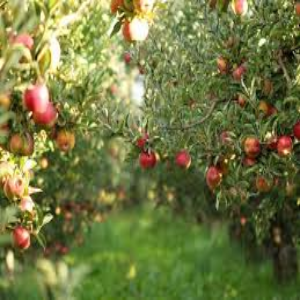

[[[ 0.39678174  0.2625177   0.94845897  1.0176739 ]
  [ 0.05784553  0.17388293  0.60049796  1.0232198 ]
  [ 0.21112782  0.29254156  0.7439054   1.0095091 ]
  [ 0.40057334  0.38966635  0.6941098   1.0283622 ]
  [ 0.42768312  0.46090215  0.8457507   0.98912376]
  [ 0.16965777  0.06484947  0.8250049   0.9762322 ]
  [ 0.02725767 -0.00754103  0.41790354  0.6214211 ]
  [ 0.5234581   0.44495052  0.96513414  0.9904229 ]
  [-0.00278932  0.04086706  0.37569603  0.9713229 ]
  [ 0.45377767  0.16917649  0.6654413   0.9400052 ]]]
[[0.13106835 0.12740889 0.1183058  0.06231609 0.05992684 0.04691067
  0.0403128  0.0378463  0.03504962 0.03458837]]


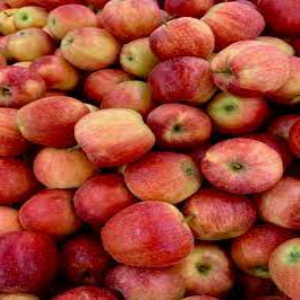

In [ ]:
#Testing using tflite model 
import tensorflow as tf
import numpy as np
import cv2
import pathlib
from google.colab.patches import cv2_imshow
from PIL import Image

interpreter = tf.lite.Interpreter(model_path="EM_accurate_modified.tflite")

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print(input_details)
print(output_details)

interpreter.allocate_tensors()

def draw_rect(image, box):
    y_min = int(max(1, (box[0] * 300)))
    x_min = int(max(1, (box[1] * 300)))
    y_max = int(min(300, (box[2] * 300)))
    x_max = int(min(300, (box[3] * 300)))
    
    # draw a rectangle on the image
    cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255, 255, 255), 2)

for file in pathlib.Path('images/NEW').iterdir():

    if file.suffix != '.jpg' and file.suffix != '.png':
        continue
    
    img = cv2.imread(r"{}".format(file.resolve()))
    new_img=np.array(img, dtype=np.float32)
    new_img=cv2.resize(new_img, (300, 300))
    interpreter.set_tensor(input_details[0]['index'], [new_img])
    interpreter.invoke()
    rects = interpreter.get_tensor(
        output_details[0]['index'])
    print(rects)
    scores = interpreter.get_tensor(
        output_details[2]['index'])
    print(scores)

    for index,score in enumerate(scores[0]):
      if score > 0.5:
        print(rects[0][index])
        print(score)
        draw_rect(new_img,rects[0][index])
          
    cv2_imshow(new_img)
    #cv2_imshow.waitKey(0)

**Writing metadata to the model**

In [ ]:
cd /content/drive/MyDrive/Tf2-Object-Detection-Folder/object_detection

*`Writing Metadata `*

In [ ]:
from tflite_support.metadata_writers import object_detector
from tflite_support.metadata_writers import writer_utils
from tflite_support import metadata

ObjectDetectorWriter = object_detector.MetadataWriter
_MODEL_PATH = "EM_accurate_modified.tflite"
_LABEL_FILE = "label.txt"
_SAVE_TO_PATH = "EM_accurate_modified.tflite"

writer = ObjectDetectorWriter.create_for_inference(
    writer_utils.load_file(_MODEL_PATH), [127.5], [127.5], [_LABEL_FILE])
writer_utils.save_file(writer.populate(), _SAVE_TO_PATH)

# Verify the populated metadata and associated files.
displayer = metadata.MetadataDisplayer.with_model_file(_SAVE_TO_PATH)
print("Metadata populated:")
print(displayer.get_metadata_json())
print("Associated file(s) populated:")
print(displayer.get_packed_associated_file_list())

In [ ]:
from tflite_support import metadata

displayer = metadata.MetadataDisplayer.with_model_file("Emeter2meta_data.tflite")
print("Metadata populated:")
print(displayer.get_metadata_json())

print("Associated file(s) populated:")
for file_name in displayer.get_packed_associated_file_list():
  print("file name: ", file_name)
  print("file content:")
  print(displayer.get_associated_file_buffer(file_name))